In [1]:
import pandas as pd
import numpy as np
import pyreadr

In [145]:
years = list(range(89, 99))+ [99] + list(range(1400, 1403))
df12 = pd.DataFrame()
for year in years:
    dataframes = []
    df1 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\base1\base{year}")
    df2 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\base2\HHP1_{year}")
    df3 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\base3\P2_{year}")
    df4 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\food\Food_{year}")
    df5 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\food\Cigar_{year}")
    df6 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\food\NonCatDrinks_{year}")
    df7 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\sectors\Cloth_{year}")
    df8 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\sectors\Invest_{year}")
    df9 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\sectors\Part3_{year}")
    df10 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\sectors\section04_{year}")
    df11 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\sectors\section13_{year}")
    
    dataframes.extend([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11])
    merged_df = dataframes[0]
    for i in range(1, len(dataframes)):
        merged_df = merged_df.merge(dataframes[i], on='HHID', how='left')
    
    merged_df["year"] = year
    print(merged_df.shape[0])
    
    pd.to_pickle(merged_df, f"Merged_{year}")
    
    metadata = pd.DataFrame({
    "col" : list(merged_df.columns),
    f"missed{year}" : merged_df.notna().sum(),
    })
    
    if year == 89:
        df13 = metadata.reset_index(drop=True)
    else:
        df13 = pd.merge(df13, metadata, on="col", how="left")

    

38950
40011
40007
39864
39856
39857
39864
37962
38960
38328
37557
37988
37951
37883


In [146]:
pd.to_pickle(df13, "meta_data")

In [147]:
meta_data = pd.read_pickle("meta_data")
meta_data

,col,missed89,missed90,missed91,missed92,missed93,missed94,missed95,missed96,missed97,missed98,missed99,missed1400,missed1401,missed1402
0,HHID,38950,40011,40007.0,39864.0,39856.0,39857.0,39864.0,37962.0,38960.0,38328.0,37557.0,37988.0,37951.0,37883.0
1,month,38950,40010,40007.0,39852.0,39856.0,39857.0,39864.0,37962.0,38959.0,38328.0,37557.0,0.0,0.0,0.0
2,head_job,38950,40007,40007.0,38315.0,39856.0,39857.0,39864.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,household_type,38950,40011,40007.0,39864.0,39856.0,39857.0,39864.0,37962.0,38960.0,38328.0,37557.0,37988.0,37951.0,37883.0
4,region,38950,40011,40007.0,39864.0,39856.0,39857.0,39864.0,37962.0,38960.0,38328.0,37557.0,37988.0,37951.0,37883.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,CommunicationExtraExp,38950,40011,40007.0,39864.0,39856.0,39857.0,39864.0,37962.0,38960.0,38328.0,37557.0,37988.0,37951.0,37883.0
101,AmusementExtraExp,38950,40011,40007.0,39864.0,39856.0,39857.0,39864.0,37962.0,38960.0,38328.0,37557.0,37988.0,37951.0,37883.0
102,EducationExp,38950,40011,40007.0,39864.0,39856.0,39857.0,39864.0,37962.0,38960.0,38328.0,37557.0,37988.0,37951.0,37883.0
103,OtherExtraExp,38950,40011,40007.0,39864.0,39856.0,39857.0,39864.0,37962.0,38960.0,38328.0,37557.0,37988.0,37951.0,37883.0


In [148]:
meta = meta_data.set_index(meta_data["col"]).transpose()
meta = meta.iloc[1:,:]
meta

col,HHID,month,head_job,household_type,region,quarter,weight,county_code,province_code,county89,...,ClothesExtraExp,HousingMaintainExp,FurniExtraExp,MedicalExtraExp,TransportationExtraExp,CommunicationExtraExp,AmusementExtraExp,EducationExp,OtherExtraExp,year
missed89,38950,38950,38950,38950,38950,38950,0,38285,38950,38285,...,38950,38950,38950,38950,38950,38950,38950,38950,38950,38950
missed90,40011,40010,40007,40011,40011,40011,0,38513,40011,38513,...,40011,40011,40011,40011,40011,40011,40011,40011,40011,40011
missed91,40007.0,40007.0,40007.0,40007.0,40007.0,40007.0,0.0,38192.0,40007.0,NaN,...,40007.0,40007.0,40007.0,40007.0,40007.0,40007.0,40007.0,40007.0,40007.0,40007.0
missed92,39864.0,39852.0,38315.0,39864.0,39864.0,39864.0,0.0,39864.0,39864.0,NaN,...,39864.0,39864.0,39864.0,39864.0,39864.0,39864.0,39864.0,39864.0,39864.0,39864.0
missed93,39856.0,39856.0,39856.0,39856.0,39856.0,39856.0,0.0,39856.0,39856.0,NaN,...,39856.0,39856.0,39856.0,39856.0,39856.0,39856.0,39856.0,39856.0,39856.0,39856.0
missed94,39857.0,39857.0,39857.0,39857.0,39857.0,39857.0,0.0,39857.0,39857.0,NaN,...,39857.0,39857.0,39857.0,39857.0,39857.0,39857.0,39857.0,39857.0,39857.0,39857.0
missed95,39864.0,39864.0,39864.0,39864.0,39864.0,39864.0,0.0,39864.0,39864.0,NaN,...,39864.0,39864.0,39864.0,39864.0,39864.0,39864.0,39864.0,39864.0,39864.0,39864.0
missed96,37962.0,37962.0,NaN,37962.0,37962.0,37962.0,37962.0,37962.0,37962.0,NaN,...,37962.0,37962.0,37962.0,37962.0,37962.0,37962.0,37962.0,37962.0,37962.0,37962.0
missed97,38960.0,38959.0,NaN,38960.0,38960.0,38960.0,38960.0,38960.0,38960.0,NaN,...,38960.0,38960.0,38960.0,38960.0,38960.0,38960.0,38960.0,38960.0,38960.0,38960.0
missed98,38328.0,38328.0,NaN,38328.0,38328.0,38328.0,38328.0,38328.0,38328.0,NaN,...,38328.0,38328.0,38328.0,38328.0,38328.0,38328.0,38328.0,38328.0,38328.0,38328.0


In [149]:
list_cols = []
for col in meta.columns:
    if meta[col].isna().sum() == 0:
        list_cols.append(col)

print(list_cols)

['HHID', 'month', 'household_type', 'region', 'quarter', 'weight', 'county_code', 'province_code', 'province', 'HHsize', 'AveAge', 'NumChild_U5', 'NumChild_B5_7', 'NumChild_B7_18', 'NumChildOver18', 'HeadWoman', 'Dep_Student', 'Num_Literate', 'NumSpouse', 'NumEmployed', 'NumOld', 'NumMale', 'NumNotfirstR', 'Tenure', 'Room', 'Area', 'Skeleton', 'MainMaterial', 'PrivateVehicle', 'Motorcycle', 'Bike', 'Radio', 'Cassette', 'TVbw', 'TV', 'VideoPlayer', 'Computer', 'Cellphone', 'Freezer', 'Refrigerator', 'Freez_refrig', 'Vacuum', 'Washer', 'Sewing', 'Fan', 'Cooler_water_portable', 'Cooler_gas_portable', 'Dishwasher', 'None', 'Pipewater', 'Electricity', 'Pipegas', 'Phone', 'Internet', 'Bathroom', 'Kitchen', 'Cooler_water', 'Centralcooler', 'Centralheat', 'Pakage', 'Cooler_gas', 'Sewer_network', 'Cookfuel', 'Heatfuel', 'Hotwaterfuel', 'FoodExp', 'CigarExp', 'NonCatDrinksExp', 'ClothExp', 'InvestExp', 'FurnitureExp', 'MedicalExp', 'TransportationExp', 'CommunicationExp', 'AmusementExp', 'Restau

In [150]:
len(list_cols)

101

In [95]:
energy = pd.read_csv(r"C:\Users\Mahsa\Desktop\geo\energy_pre_used.csv", dtype={"HHID": "str"})
energy = energy.iloc[:, 1:]
years = list(range(89, 102))
energy = energy.loc[energy["year"].isin(years)]
energy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 494223 entries, 0 to 494222
Data columns (total 74 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   HHID                      494223 non-null  object 
 1   year                      494223 non-null  int64  
 2   season                    494223 non-null  int64  
 3   province                  494223 non-null  object 
 4   region                    494223 non-null  object 
 5   county                    494223 non-null  object 
 6   family_size               494223 non-null  int64  
 7   decile                    494223 non-null  int64  
 8   is_abso_poverty           494223 non-null  int64  
 9   is_nutri_poverty          494223 non-null  int64  
 10  age_head                  494223 non-null  int64  
 11  sex_head                  494223 non-null  object 
 12  weight                    494223 non-null  float64
 13  OECD_size                 494223 non-null  float6

In [96]:
energy["year"] = np.where(energy["year"] == 100, 1400,
                          np.where(energy["year"] == 101, 1401,energy["year"]))
energy["year"].unique()

array([1401, 1400,   99,   98,   97,   96,   95,   94,   93,   92,   91,
         90,   89], dtype=int64)

In [151]:
cols = ['county_code','HHsize', 'NumChild_U5',
       'NumChild_B5_7', 'NumChild_B7_18', 'NumChildOver18', 'HeadWoman',
       'Dep_Student', 'Num_Literate', 'NumSpouse', 'NumEmployed', 'NumOld',
       'NumMale', 'NumNotfirstR', 'Tenure', 'Room', 'Area', 'Skeleton',
       'MainMaterial', 'PrivateVehicle', 'Motorcycle', 'Bike', 'Radio',
       'Cassette', 'TVbw', 'TV', 'VideoPlayer', 'Computer', 'Cellphone',
       'Freezer', 'Refrigerator', 'Freez_refrig', 'Vacuum', 'Washer', 'Sewing',
       'Fan', 'Cooler_water_portable', 'Cooler_gas_portable', 'Dishwasher',
       'None', 'Pipewater', 'Electricity', 'Pipegas', 'Phone', 'Internet',
       'Bathroom', 'Kitchen', 'Cooler_water', 'Centralcooler', 'Centralheat',
       'Pakage', 'Cooler_gas', 'Sewer_network', 'Cookfuel', 'Heatfuel',
       'Hotwaterfuel']
merged = pd.read_pickle(r"C:\Users\Mahsa\Desktop\geo\merged\Merged_89")
merged = merged.loc[:, list_cols]
years = list(range(90, 99))+ [99] + list(range(1400, 1403))
for year in years:
    df = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\merged\Merged_{year}")
    df = df.loc[:, list_cols]
    merged = pd.concat([merged, df], axis=0)
    merged['AveAge'] = merged['AveAge'].fillna(merged.groupby('HHID')['AveAge'].transform('first')+(year - merged.groupby('HHID')["year"].transform('last')))
merged = merged.loc[merged["HHID"].str.len().isin([10,11]), :]
for col in cols:
    merged[col] = merged[col].fillna(merged.groupby('HHID')[col].transform('first'))
print(merged.columns)
merged.head()

Index(['HHID', 'month', 'household_type', 'region', 'quarter', 'weight',
       'county_code', 'province_code', 'province', 'HHsize',
       ...
       'ClothesExtraExp', 'HousingMaintainExp', 'FurniExtraExp',
       'MedicalExtraExp', 'TransportationExtraExp', 'CommunicationExtraExp',
       'AmusementExtraExp', 'EducationExp', 'OtherExtraExp', 'year'],
      dtype='object', length=101)


,HHID,month,household_type,region,quarter,weight,county_code,province_code,province,HHsize,...,ClothesExtraExp,HousingMaintainExp,FurniExtraExp,MedicalExtraExp,TransportationExtraExp,CommunicationExtraExp,AmusementExtraExp,EducationExp,OtherExtraExp,year
0,2000025066,1,NormalResiding,Rural,spring,NaN,0001,00,مرکزی,7.0,...,0.0,0.000000,0.0,0.0,20833.333333,0.000000,0.000000,0.0,111726.333333,89
1,2000077193,2,NormalResiding,Rural,spring,NaN,0006,00,مرکزی,6.0,...,0.0,0.000000,1750000.0,0.0,2500.000000,0.000000,15583.333333,0.0,153169.000000,89
2,2000149068,2,NormalResiding,Rural,spring,NaN,0001,00,مرکزی,3.0,...,0.0,16666.666667,0.0,0.0,0.000000,20833.333333,0.000000,0.0,77513.666667,89
3,2000125050,2,NormalResiding,Rural,spring,NaN,0010,00,مرکزی,5.0,...,0.0,0.000000,0.0,0.0,35416.666667,0.000000,6950.000000,0.0,27500.000000,89
4,2000065114,2,NormalResiding,Rural,spring,NaN,0005,00,مرکزی,2.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,2083.333333,0.0,240398.000000,89


In [152]:
exps = [
    'FoodExp', 'CigarExp', 'NonCatDrinksExp', 'ClothExp',
    'InvestExp', 'FurnitureExp', 'MedicalExp', 'TransportationExp',
    'CommunicationExp', 'AmusementExp', 'RestaurantExp', 'HotelExp',
    'OtherExp', 'RentExp', 'EstRent_ownerExp', 'EstRentExp', 'MortgageExp', 'WaterExp',
    'Water_otherExp', 'SewageExp', 'OtherHousingExp', 'ElectricityExp',
    'ElectricityOtherExp', 'NaturalGasExp', 'NaturalGasOtherExp',
    'OtherEnergyReExp', 'ClothesExtraExp', 'HousingMaintainExp',
    'FurniExtraExp', 'MedicalExtraExp', 'TransportationExtraExp',
    'CommunicationExtraExp', 'AmusementExtraExp', 'EducationExp',
    'OtherExtraExp'
]
merged[exps] = merged[exps].fillna(0)
merged["all_expenditure"] = (
    merged["FoodExp"]+
    merged["CigarExp"]+
    merged["NonCatDrinksExp"]+
    merged["ClothExp"]+
    #merged["InvestExp"]+
    merged["FurnitureExp"]+
    merged["MedicalExp"]+
    merged["TransportationExp"]+
    merged["CommunicationExp"]+
    merged["AmusementExp"]+
    merged["RestaurantExp"]+
    merged["HotelExp"]+
    merged["OtherExp"]+
    merged["RentExp"]+
    merged["EstRent_ownerExp"]+
    merged["EstRentExp"]+
    #merged["MortgageExp"]+
    merged["WaterExp"]+
    merged["Water_otherExp"]+
    merged["SewageExp"]+
    merged["OtherHousingExp"]+
    merged["ElectricityExp"]+
    merged["ElectricityOtherExp"]+
    merged["NaturalGasExp"]+
    merged["NaturalGasOtherExp"]+
    merged["OtherEnergyReExp"]+
    merged["ClothesExtraExp"]+
    merged["HousingMaintainExp"]+
    merged["FurniExtraExp"]+
    merged["MedicalExtraExp"]+
    merged["TransportationExtraExp"]+
    merged["CommunicationExtraExp"]+
    merged["AmusementExtraExp"]+
    merged["EducationExp"]+
    merged["OtherExtraExp"]
)

merged.to_pickle("merged")

In [98]:
df = pd.merge(merged, energy, on = ["HHID","year"], how="inner")
print(np.all(df["ElectricityExp"] == df["electricity_cost"]))
print(df.shape[0]== energy.shape[0])

True
True


In [164]:
#merged = pd.read_pickle("merged")
merged.isna().sum()

HHID                    0
month              113835
household_type          0
region                  0
quarter                 0
                    ...  
year                    0
all_expenditure         0
all_energy_EXP          0
energy_Ratio        10429
Weight             277058
Length: 105, dtype: int64

In [154]:
print(merged.shape[0])
print(merged["HHID"].nunique())

merged.duplicated(subset=["HHID","year"]).sum()

545037
309193


0

In [155]:
years_by_hhid = merged.groupby('HHID')['year'].agg(list).reset_index()
years_by_hhid

,HHID,year
0,1000001171,[89]
1,1000001172,"[89, 90]"
2,1000001177,"[89, 90, 91]"
3,1000001180,"[89, 90, 91]"
4,1000001181,"[89, 90, 91]"
...,...,...
309188,23006709838,"[1401, 1402]"
309189,23006709840,[1402]
309190,23006709841,[1401]
309191,23006709844,[1402]


In [156]:
years_by_hhid["num"] = years_by_hhid["year"].apply(len)
years_by_hhid[years_by_hhid["num"]>3]

,HHID,year,num
800,10001000108,"[92, 93, 97, 98]",4
806,10001000116,"[92, 93, 94, 99]",4
807,10001000117,"[93, 94, 97, 98]",4
810,10001000120,"[93, 94, 95, 98, 99, 1400]",6
811,10001000123,"[93, 94, 95, 98, 99]",5
...,...,...,...
3664,10010008829,"[94, 95, 96, 99]",4
3688,10010008917,"[93, 97, 98, 99]",4
3692,10010008923,"[93, 94, 95, 98, 99, 1400]",6
3696,10010008929,"[94, 96, 99, 1400, 1401]",5


In [157]:
merged["all_energy_EXP"] = merged["ElectricityExp"]+merged["ElectricityOtherExp"]+merged["NaturalGasExp"]+merged["NaturalGasOtherExp"]+merged["OtherEnergyReExp"]
merged["energy_Ratio"] = (merged["all_energy_EXP"] / merged["all_expenditure"]) *100

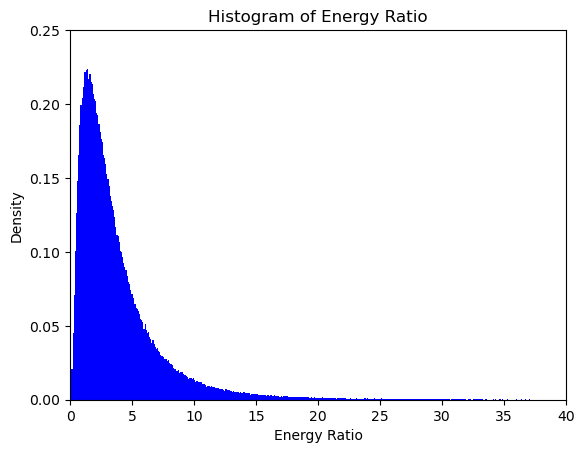

In [158]:
import matplotlib.pyplot as plt
plt.hist(merged["energy_Ratio"], color="blue", density=True, bins=1000)
plt.xlim(0, 40)
plt.ylim(0, 0.25)
plt.xlabel('Energy Ratio')
plt.ylabel('Density')
plt.title('Histogram of Energy Ratio')
plt.show()

# Merging the weights

In [160]:
years = list(range(89, 96))
theirdf = pd.DataFrame(columns=["HHID","Year","Weight"])
for year in years:
    df3 = pyreadr.read_r(fr"C:\Users\Mahsa\Desktop\geo\SamplingWeights\HHWeights{year}.rda")
    df3 = list(df3.values())[0]
    df3["HHID"] = df3["HHID"].astype("str")
    mask = df3["HHID"].str.contains(r"\.")
    df3.loc[mask, 'HHID'] = df3.loc[mask, "HHID"].str.split(".").str[0]
    theirdf= pd.concat([theirdf,df3], axis= 0)
print(theirdf.shape)

(267979, 3)


In [161]:
merged[merged["year"]< 96].shape

(278408, 104)

In [163]:
theirdf.rename(columns={
    "Year": "year"
}, inplace=True)
merged = pd.merge(merged, theirdf, on = ["HHID", "year"], how= "left")
merged.loc[merged["weight"].isna(), "weight"] = merged["Weight"]

In [ ]:
merged.drop(columns= ["Weight"], inplace = True)

In [167]:
merged.shape

(545037, 104)

In [169]:
years = list(range(89, 99))+ [99] + list(range(1400, 1403))
for year in years:
    pop = merged.loc[merged["year"]==year]["weight"].sum()
    print(f"The population in {year} is {pop.round(0)}")

The population in 89 is 20145831.0
The population in 90 is 21159033.0
The population in 91 is 21757336.0
The population in 92 is 22637024.0
The population in 93 is 23376013.0
The population in 94 is 24115010.0
The population in 95 is 24854004.0
The population in 96 is 24864484.0
The population in 97 is 25164306.0
The population in 98 is 25685577.0
The population in 99 is 26189113.0
The population in 1400 is 26693614.0
The population in 1401 is 27194087.0
The population in 1402 is 27697668.0


In [170]:
merged.to_pickle("merged")

In [2]:
merged = pd.read_pickle("merged")

In [3]:
merged.columns


Index(['HHID', 'month', 'household_type', 'region', 'quarter', 'weight',
       'county_code', 'province_code', 'province', 'HHsize',
       ...
       'MedicalExtraExp', 'TransportationExtraExp', 'CommunicationExtraExp',
       'AmusementExtraExp', 'EducationExp', 'OtherExtraExp', 'year',
       'all_expenditure', 'all_energy_EXP', 'energy_Ratio'],
      dtype='object', length=104)